In [2]:
import numpy as np  
import time 
import pandas as pd
import os
import numpy as np
import cv2
import imutils
import datetime

account_sid = 'AC66e712586be8fc969d8bb45e783db3e9'
auth_token = '2be96772306334b26baf6d9d07ffcb0b'

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
from tensorflow. keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.layers import LeakyReLU
from tensorflow.keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization ,GlobalMaxPool2D
from tensorflow.keras.optimizers import Adam
import cv2

In [28]:
train_directory = "C:\\Users\\harib\\Desktop\\Urupudra material\\Hackathon\\Vehicle and number plate detection\\Sohas_weapon-Detection"
size=94
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1 / 255,
    validation_split = 0.1,
).flow_from_directory(train_directory, batch_size = 16, target_size =
                      (size, size), subset = "training", shuffle = True)

Found 1325 images belonging to 4 classes.


In [29]:
test_directory = "C:\\Users\\harib\\Desktop\\Urupudra material\\Hackathon\\Vehicle and number plate detection\\Sohas_weapon-Detection"

In [30]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.1,
).flow_from_directory(train_directory,batch_size=16,target_size=(size,size),subset='validation',shuffle=True)

Found 147 images belonging to 4 classes.


In [31]:
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.1  
).flow_from_directory(test_directory,batch_size=16,target_size=(size,size),subset='validation',shuffle=True)


Found 147 images belonging to 4 classes.


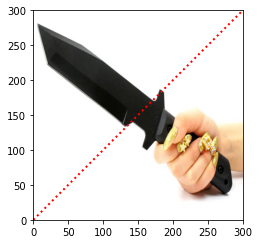

In [32]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("knife_64.jpg") 
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 300, 0, 300])
x = np.array(range(300))
ax.plot(x, x, ls='dotted', linewidth=2, color='red')
plt.show()

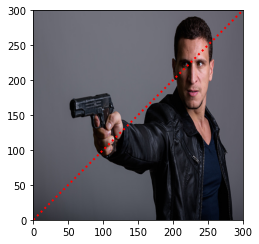

In [33]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("pundamavan.jpg") 
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 300, 0, 300])
x = np.array(range(300))
ax.plot(x, x, ls='dotted', linewidth=2, color='red')
plt.show()

In [20]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization ,GlobalMaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint

In [21]:
optimizer_adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [22]:
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=0.00001)
model_check=ModelCheckpoint('model.hdf5',monitor='val_loss',verbose=1,save_best_only=True)
callback=[EarlyStop , Reduce_LR,model_check]

In [37]:
model=Sequential([
                  Conv2D(32,3,activation='relu',kernel_initializer='he_normal',input_shape=(size,size,3)),
                  Conv2D(64,3,activation='relu',kernel_initializer='he_normal'),
                  BatchNormalization(),
                  MaxPooling2D(3),
    
                  Conv2D(128,3,activation='relu',kernel_initializer='he_normal'),
                  BatchNormalization(),
                  MaxPooling2D(3),
    
                  Conv2D(256,3,activation='relu',kernel_initializer='he_normal'),
                  BatchNormalization(),
                  MaxPooling2D(3),
    
                  Flatten(),
                  Dense(64,activation='relu',kernel_initializer='he_normal'),
                  BatchNormalization(),
                  Dense(4,activation='softmax',kernel_initializer='glorot_normal')
                  
])
       

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 92, 92, 32)        896       
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 batch_normalization_8 (Batc  (None, 90, 90, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 128)     

In [39]:

model.compile(optimizer=optimizer_adam,
              loss='categorical_crossentropy',metrics=['accuracy'])

In [40]:
history = model.fit(x = train_generator,
                    validation_data = valid_generator,
                    epochs = 50)

Epoch 1/50
83/83 [==============================] - 49s 573ms/step - loss: 0.8985 - accuracy: 0.7162 - val_loss: 1.3133 - val_accuracy: 0.3061
Epoch 2/50
83/83 [==============================] - 31s 369ms/step - loss: 0.4009 - accuracy: 0.8898 - val_loss: 0.9091 - val_accuracy: 0.6599
Epoch 3/50
83/83 [==============================] - 31s 366ms/step - loss: 0.2422 - accuracy: 0.9328 - val_loss: 0.8845 - val_accuracy: 0.6395
Epoch 4/50
83/83 [==============================] - 33s 391ms/step - loss: 0.1751 - accuracy: 0.9442 - val_loss: 0.5763 - val_accuracy: 0.7551
Epoch 5/50
83/83 [==============================] - 34s 408ms/step - loss: 0.1376 - accuracy: 0.9570 - val_loss: 1.2022 - val_accuracy: 0.5850
Epoch 6/50
83/83 [==============================] - 34s 408ms/step - loss: 0.1209 - accuracy: 0.9562 - val_loss: 1.2054 - val_accuracy: 0.3878
Epoch 7/50
83/83 [==============================] - 34s 409ms/step - loss: 0.1520 - accuracy: 0.9457 - val_loss: 1.5888 - val_accuracy: 0.4626

In [2]:
cfg_model="ssd_summit.pbtxt"
f_model="frozen_summit.pb"
model=cv2.dnn_DetectionModel(f_model,cfg_model)

SystemError: <class 'cv2.dnn_DetectionModel'> returned a result with an error set

In [160]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

<dnn_Model 0000019A55D11350>

In [161]:
classlabels=['person']

In [162]:
model1=cv2.dnn_DetectionModel(f_model,cfg_model)

In [163]:
model1.setInputSize(320,320)
model1.setInputScale(1.0/127.5)
model1.setInputMean(127.5)
model1.setInputSwapRB(True)

<dnn_Model 0000019A55D11C50>

In [164]:
import numpy as np
import cv2
import imutils
import datetime

In [145]:
from pytz import timezone 
from datetime import datetime

ind_time = datetime.now(timezone("Asia/Kolkata")).strftime('%Y-%m-%d %H:%M:%S.%f')
print(ind_time)

2022-10-23 16:03:37.738286


In [165]:
def lk():
    

    gun_cascade = cv2.CascadeClassifier('cascade.xml')
    camera = cv2.VideoCapture('U.S. Army Soldiers Conduct Short-Range Rifle Marksmanship Training.mp4')

    firstFrame = None


    gun_exist = False

    while True:
        (grabbed, frame) = camera.read()

        if not grabbed:
            break
        

        frame = imutils.resize(frame, width=500)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (21, 21), 0)

        gun = gun_cascade.detectMultiScale(gray, 1.3, 5, minSize = (100, 100))

        if len(gun) > 0:
            gun_exist = True

        for (x,y,w,h) in gun:
            frame = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]    

        if firstFrame is None:
            firstFrame = gray
            continue

        

        cv2.imshow("Security Feed", frame)
        key = cv2.waitKey(1) & 0xFF

    if gun_exist:
        print("guns detected")
        msg()
    else:
        print("guns NOT detected")

    camera.release()
    cv2.destroyAllWindows()


In [166]:
def msg():
    from pytz import timezone 
    from datetime import datetime

    ind_time = datetime.now(timezone("Asia/Kolkata")).strftime('%Y-%m-%d %H:%M:%S.%f')

    from twilio.rest import Client
    client = Client(account_sid, auth_token)


    message = client.messages .create(
                 body=  f'Weapons detected!! at {ind_time}',   
                 from_ =  +12059418686,
                 to = +918610107552
             )

    return message.sid

In [167]:
import threading
if __name__ =="__main__":
   
    t1 = threading.Thread(target = lk, args=())
    t2 = threading.Thread(target = msg, args=())
 
    t1.start()
   
    t2.start()
 
    t1.join()

    t2.join()
 
    print("Done!")

guns detected
Done!


In [10]:
lk()

guns detected


In [1]:
h=20

In [2]:
def s():
    if h>50:
        print("yes")
        m()
    else:
        print("no")

In [5]:
def m():
    
    print("1")

In [6]:
import threading
if __name__ =="__main__":
   
    t1 = threading.Thread(target = s, args=())
    t2 = threading.Thread(target = m, args=())
 
    t1.start()
   
    t2.start()
 
    t1.join()

    t2.join()
 
    print("Done!")

no
1
Done!
